**Using checkpoint_pincodes_to_zones-cleaned.csv dataset that contains ~26k rows of FedEx data**

In [1]:
from google.colab import files 
import pandas as pd 
import io
uploaded = files.upload()

Saving checkpoint_pincodes_to_zones-cleaned.csv to checkpoint_pincodes_to_zones-cleaned.csv


In [2]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['checkpoint_pincodes_to_zones-cleaned.csv'])) 
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25927 entries, 0 to 25926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Column                  25927 non-null  int64 
 1   tracking_number         25927 non-null  int64 
 2   last_checkpoint         25927 non-null  object
 3   first_checkpoint        25927 non-null  object
 4   source_city             25927 non-null  object
 5   destination_city        25927 non-null  object
 6   source_zip              25927 non-null  object
 7   destination_zip         25927 non-null  int64 
 8   carrier                 25927 non-null  object
 9   time_to_delivery_hours  25927 non-null  int64 
 10  szone                   25927 non-null  object
 11  dzone                   25927 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.4+ MB
None


In [3]:
dataset["szone"] = dataset["szone"].astype("category")
dataset["dzone"] = dataset["dzone"].astype("category")
dataset["carrier"] = dataset["carrier"].astype("category")
dataset["source_city"] = dataset["source_city"].astype("category")
dataset["source_zip"] = dataset["source_zip"].astype("category")
dataset["destination_city"] = dataset["destination_city"].astype("category")
dataset["destination_zip"] = dataset["destination_zip"].astype("category")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25927 entries, 0 to 25926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Column                  25927 non-null  int64   
 1   tracking_number         25927 non-null  int64   
 2   last_checkpoint         25927 non-null  object  
 3   first_checkpoint        25927 non-null  object  
 4   source_city             25927 non-null  category
 5   destination_city        25927 non-null  category
 6   source_zip              25927 non-null  category
 7   destination_zip         25927 non-null  category
 8   carrier                 25927 non-null  category
 9   time_to_delivery_hours  25927 non-null  int64   
 10  szone                   25927 non-null  category
 11  dzone                   25927 non-null  category
dtypes: category(7), int64(3), object(2)
memory usage: 1.5+ MB


In [4]:
dataset['source_city'].value_counts()

Ind               4883
Bangalore         2199
Mumbai            1741
Pune              1058
Thane              865
                  ... 
Miami Township       1
Minneapolis          1
Montreal             1
Morbi                1
110106               1
Name: source_city, Length: 753, dtype: int64

In [5]:
dataset['dzone'].value_counts()

West         6151
Bangalore    5642
Mumbai       4107
Delhi        2898
South        2568
Kolkata      1916
North        1621
Chennai       907
East          117
Name: dzone, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Heatmap of Zone combinations and count of deliveries**

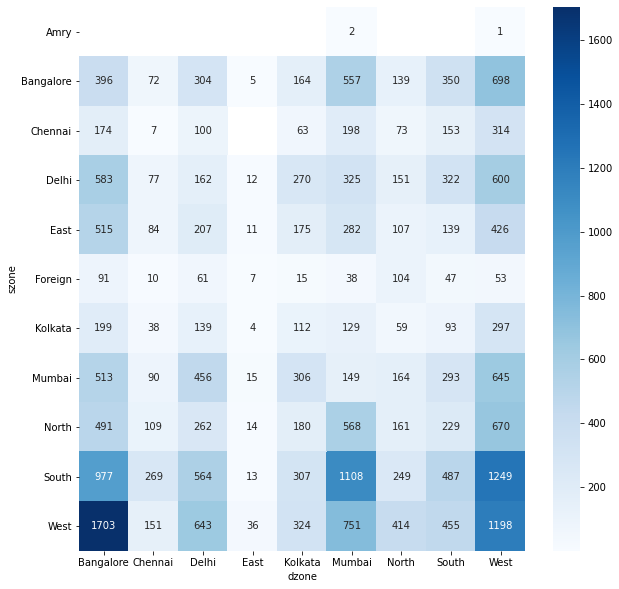

In [14]:
df_heatmap = dataset.groupby(['szone','dzone']).count().pivot_table(values='carrier',index='szone',columns='dzone',aggfunc=np.mean)
plt.subplots(figsize=(10,10))
sns.heatmap(df_heatmap,annot=True, cmap='Blues', fmt='g')

**Heatmap of Zone combinations and average time to delivery**

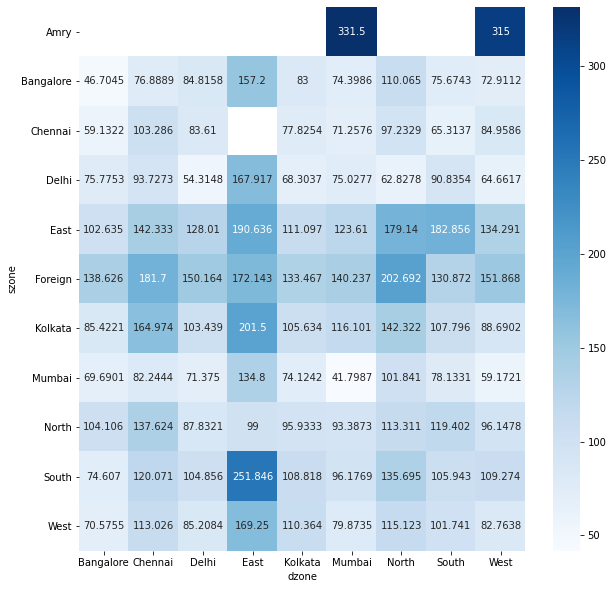

In [15]:
df_heatmap = dataset.groupby(['szone','dzone']).mean().pivot_table(values='time_to_delivery_hours',index='szone',columns='dzone')
plt.subplots(figsize=(10,10))
sns.heatmap(df_heatmap,annot=True, cmap='Blues', fmt='g')